# Determinar a probabilidade do usuário de comprar uma SUV, baseado em sua idade e salário.

### Importar bibliotecas 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import chi2, chisquare
from statsmodels.graphics.regressionplots import abline_plot
import scipy.stats as stats 
from sklearn.metrics import roc_curve, auc
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Importar base de dados  

In [2]:
df = pd.read_csv("SUV_Network_Ads (1).csv")
df.shape

(400, 5)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


Descrição de variáveis
*   User ID: Código ID do cliente;
*   Gender: Gênero(Masculino e Feminino);
*   Age: Idade;
*   EstimatedSalary: Sálario estimado;
*   Purchased: Realizou a compra ou não(1 = Comprou, 0 = Não comprou) 

### Analise de quantidade de valores nulos e informações das variáveis 

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df_1 = df[['Age', 'EstimatedSalary', 'Purchased']]

In [8]:
df_1.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Análise de gráficos, para entendimento de distribuição e correlação das variáveis. 

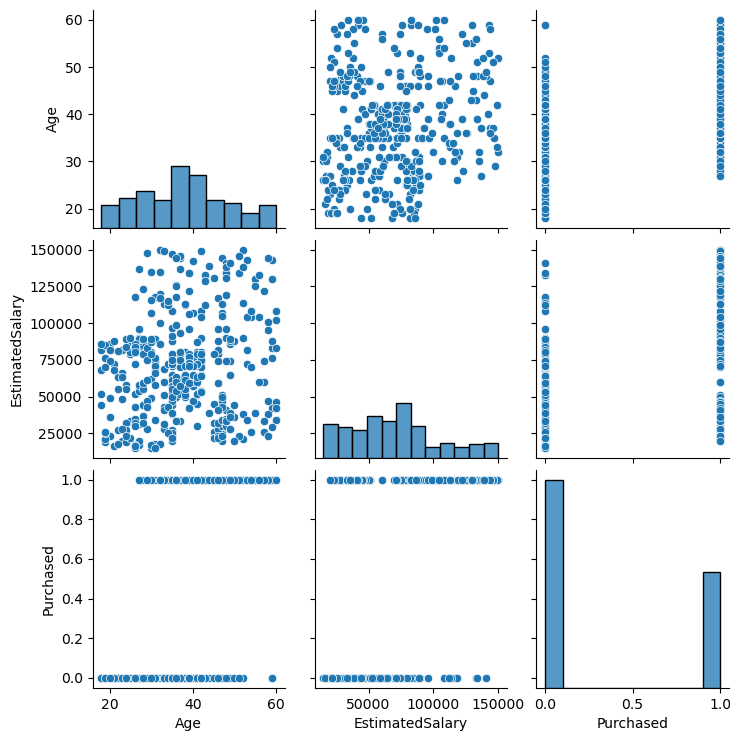

In [9]:
sns.pairplot(data=df_1);

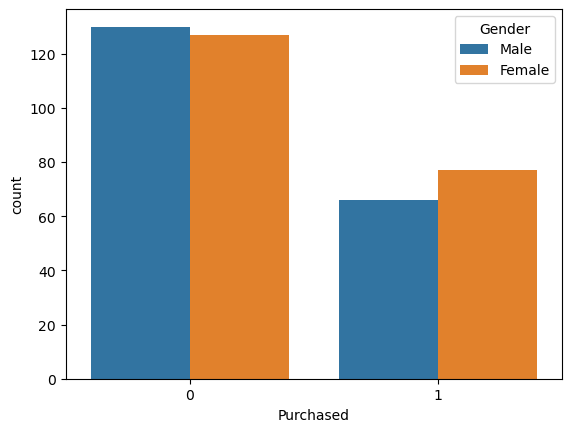

In [10]:
sns.countplot(data=df, x='Purchased', hue='Gender');

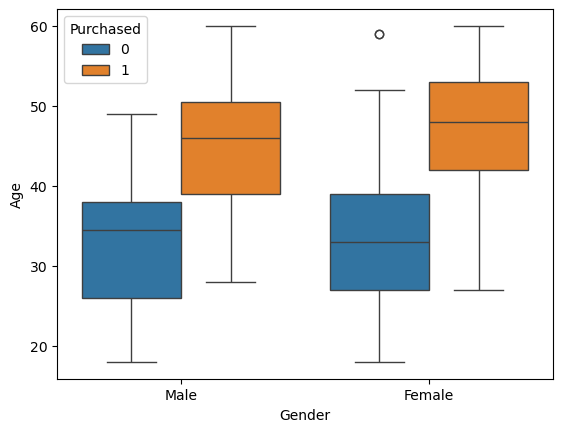

In [11]:
sns.boxplot(data=df,x='Gender', y='Age', hue='Purchased');	

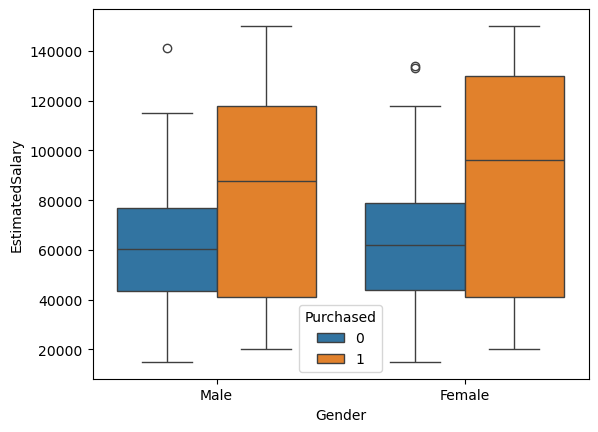

In [12]:
sns.boxplot(data=df,x='Gender', y='EstimatedSalary', hue='Purchased');	

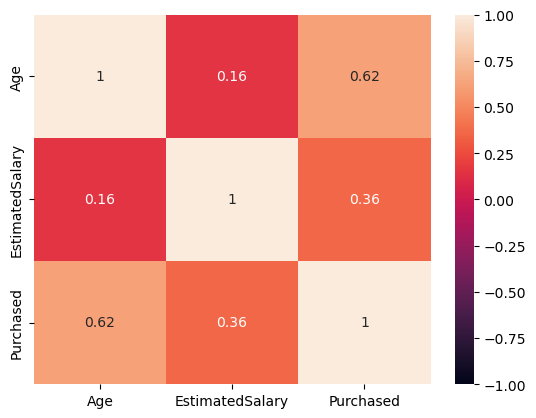

In [13]:
sns.heatmap(data=df_1.corr(), annot=True, vmax=1,vmin=-1); 

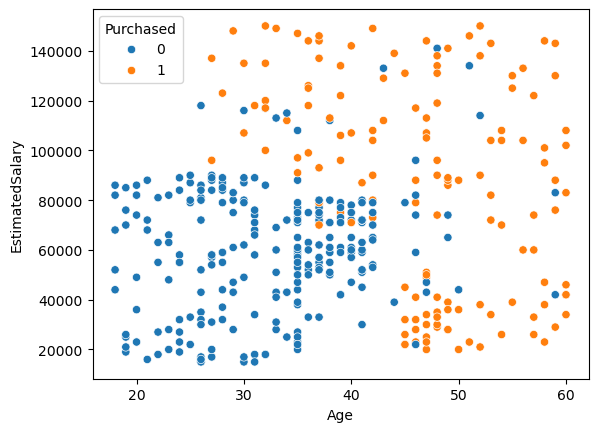

In [14]:
sns.scatterplot(data=df_1, x='Age', y='EstimatedSalary', hue='Purchased');

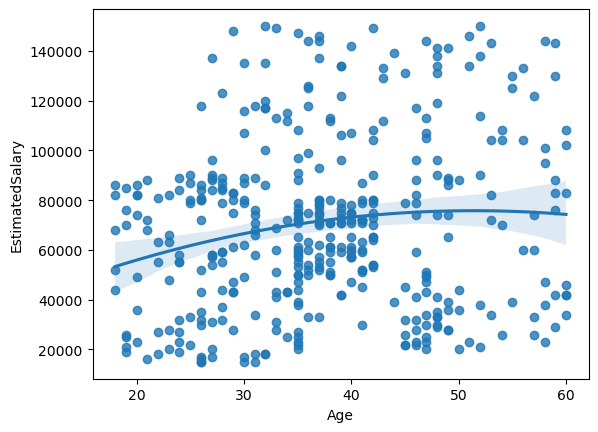

In [15]:
sns.regplot(data=df_1, x='Age', y='EstimatedSalary', order=2);

## Modelo de Binomial

In [16]:
x = df_1[['Age', 'EstimatedSalary']]
y = df_1[['Purchased']]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 2)
(120, 2)
(280, 1)
(120, 1)


In [18]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [19]:
modelo = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  280
Model:                            GLM   Df Residuals:                      277
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.48
Date:                Mon, 03 Mar 2025   Deviance:                       208.95
Time:                        15:57:55   Pearson chi2:                     280.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4170
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.9128      1.319     

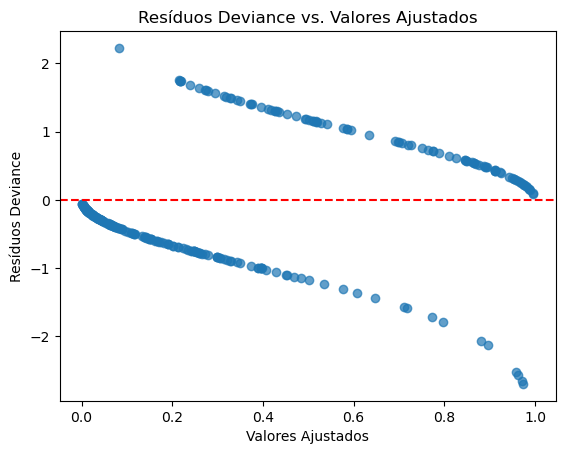

In [20]:
residuos_deviance = modelo.resid_deviance
residuos_pearson = modelo.resid_pearson
valores_ajustados = modelo.fittedvalues
plt.scatter(valores_ajustados, residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos Deviance vs. Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos Deviance")
plt.show()

Text(0.5, 1.0, 'Resíduos de Deviance vs. Índice')

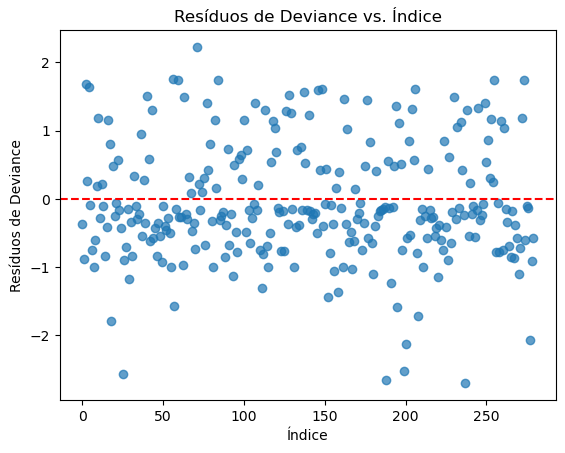

In [21]:
plt.scatter(range(len(residuos_deviance)), residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Resíduos de Deviance')
plt.title('Resíduos de Deviance vs. Índice')

In [22]:
deviance_test_statistic = modelo.deviance
deviance_df = modelo.df_resid
deviance_p_value = 1 - stats.chi2.cdf(deviance_test_statistic, deviance_df)
print("Teste de Deviance para os Resíduos:")
print("Estatística de teste:", deviance_test_statistic)
print("Graus de liberdade:", deviance_df)
print("Valor p:", deviance_p_value)

Teste de Deviance para os Resíduos:
Estatística de teste: 208.95012877976632
Graus de liberdade: 277
Valor p: 0.9991553516628546


#### Deviance Residuals
* Com um Valor p maior que (0,05), concluímos que o modelo ajusta bem os dados. 

In [23]:
residuos_pearson = modelo.resid_pearson

pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo.df_model - 1  
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)
print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)


Teste de Pearson para os Resíduos:
Estatística de teste: 279.71290736383366
Graus de liberdade: 277
Valor p: 0.4430692452083611


#### Pearson Chi-Square Test
* Com um Valor p menor que (0,05), concluímos que o modelo não ajusta bem os dados.

In [24]:
y_test_pred = modelo.predict(x_test)

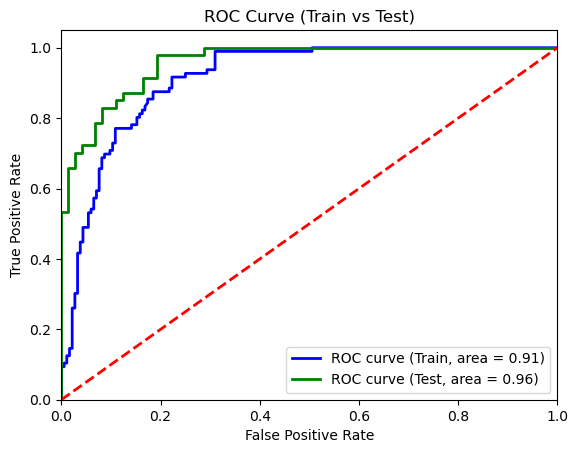

In [25]:
# Curva ROC e AUC para a base de treino
fpr_train, tpr_train, _ = roc_curve(y_train, modelo.fittedvalues)
roc_auc_train = auc(fpr_train, tpr_train)

# Curva ROC e AUC para a base de teste
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train, area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (Test, area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train vs Test)')
plt.legend(loc="lower right")
plt.show()

### Podemos notar valores altos e siguinificativos na curva Roc

In [26]:
def hosmer_lemeshow_test(y_true, y_pred, n_groups=3):

    df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    df = df.sort_values(by='y_pred').reset_index(drop=True)

    df['group'] = pd.qcut(df['y_pred'], q=n_groups, duplicates='drop')
    n_groups = df['group'].nunique()  

    # Calcular estatísticas por grupo
    observed = df.groupby('group')['y_true'].sum()
    expected = df.groupby('group')['y_pred'].sum()
    total = df.groupby('group').size()

    chi2_stat = ((observed - expected) ** 2 / (expected * (1 - expected / total))).sum()
    p_value = 1 - chi2.cdf(chi2_stat, df=n_groups - 2)  

    return chi2_stat, p_value

In [27]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

In [28]:
# Realizar0
chi2_stat, p_value = hosmer_lemeshow_test(y_test, y_test_pred)
print(f"Estatística do Teste de Hosmer-Lemeshow: {chi2_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

Estatística do Teste de Hosmer-Lemeshow: 5.2368
P-valor: 0.0221


C:\Users\gabri\AppData\Local\Temp\ipykernel_13960\1951629224.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  observed = df.groupby('group')['y_true'].sum()
C:\Users\gabri\AppData\Local\Temp\ipykernel_13960\1951629224.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expected = df.groupby('group')['y_pred'].sum()
C:\Users\gabri\AppData\Local\Temp\ipykernel_13960\1951629224.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

#### Teste de Hosmer-Lemeshow
* Esse teste os dados são ordenados com base nas probabilidades previstas e divididos em n_groups (que por padrão, 10 grupos), entretanto essa divisão padrão não funciona bem para conjuto de dados com poucos dados por isso foi adaptado para 3 deciles 

In [29]:
coeficientes = modelo.params
odds_ratio = np.exp(coeficientes)
print("\nOdds Ratio:")
print(odds_ratio)


Odds Ratio:
const              0.000018
Age                1.218649
EstimatedSalary    1.000033
dtype: float64


####  Analise do Odds Ratio
* Na variável Age podemos ver que para cada unidade de aumento, as chances do evento ocorrer aumentam em aproximadamente 21,86 %.
* Na variável EstimatedSalary podemos ver que cada unidade de aumento as chances do evento ocorrer aumentam em aproximadamente 0,003 %